In [14]:
#final code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # for plotting the data

#using some built in functions to keep the code simpler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


#importing training functions for classification of data to find out which gives the best accuracy
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


iris = pd.read_csv('iris/Iris_Data.csv')
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


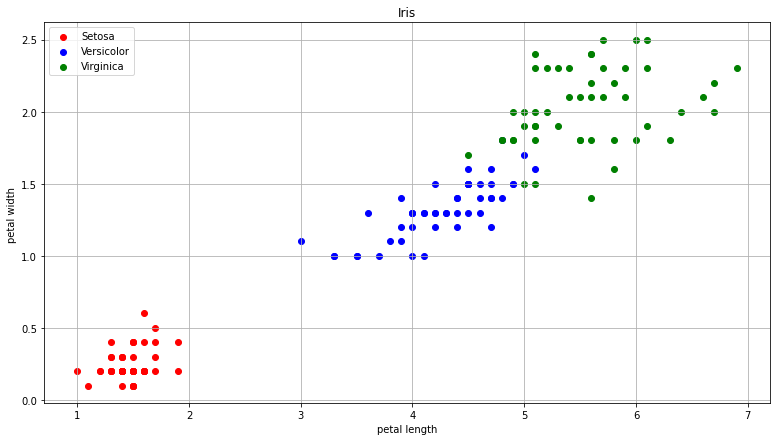

In [10]:
# petal visualisation

setosa = iris[iris.species == 'Iris-setosa']
versicolor = iris[iris.species == 'Iris-versicolor']
virginica = iris[iris.species == 'Iris-virginica']

figure, axis = plt.subplots()
figure.set_size_inches(13,7)

axis.scatter(setosa['petal_length'], setosa['petal_width'],label="Setosa", facecolor="red")
axis.scatter(versicolor['petal_length'], versicolor['petal_width'],label="Versicolor", facecolor="blue")
axis.scatter(virginica['petal_length'], virginica['petal_width'],label="Virginica", facecolor="green")

axis.set_xlabel( 'petal length')
axis.set_ylabel('petal width ')
axis.grid()
axis.set_title( 'Iris')
axis.legend()

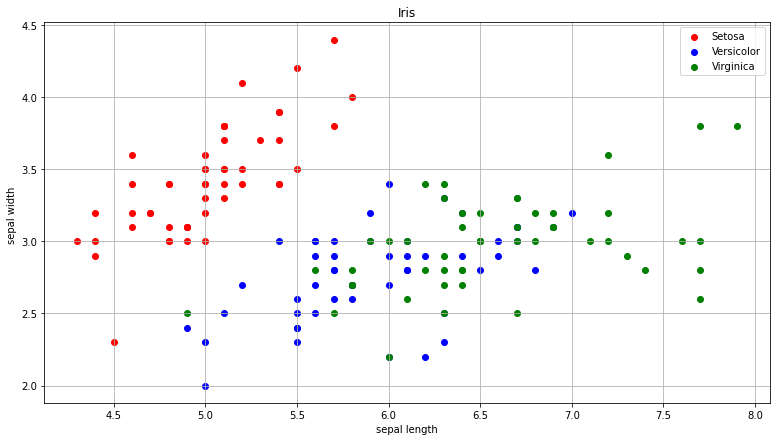

In [11]:
# sepal visualisation
figure, axis = plt.subplots()
figure.set_size_inches(13,7)

axis.scatter(setosa['sepal_length'], setosa['sepal_width'],label="Setosa", facecolor="red")
axis.scatter(versicolor['sepal_length'], versicolor['sepal_width'],label="Versicolor", facecolor="blue")
axis.scatter(virginica['sepal_length'], virginica['sepal_width'],label="Virginica", facecolor="green")

axis.set_xlabel( 'sepal length')
axis.set_ylabel('sepal width ')
axis.grid()
axis.set_title( 'Iris')
axis.legend()

In [12]:
iris_features = iris.drop(['species'], axis = 1)
iris_species = iris['species']

features_train, features_test, species_train, species_test = train_test_split(iris_features,iris_species, test_size = 0.20 , random_state = 1 )

In [16]:
models = []                                   # this is a piece of code I have found in a tutorial, when I run the models in sperately, I have found bizarre results such as KN classifier gave %100 accuracy.
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, features_train, species_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\tgok2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tgok2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.966667 (0.040825)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVC: 0.983333 (0.033333)


In [17]:
svc_func = SVC(gamma = 'auto')
svc_func.fit(features_train, species_train)
prediction = svc_func.predict(features_test)

In [28]:
print( "Test accuracy = ", accuracy_score(species_test, prediction))
print( "Classification Report = \n", classification_report(species_test, prediction))

Test accuracy =  0.9666666666666667
Classification Report = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

